# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 566


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
#  To understand the JSON output form the Open Weather API a sample was queried to look at the heirrachy of the returned info

# Sample coordinates
lat = 33.44
lon = -94.04
units = "metric"

# Fecthing of the sample data in JSON
url = f"https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={weather_api_key}&units={units}"
weather = requests.get(url).json()

# Saving & printing the output to a file to study the heirrachy of info
with open("../research/weather_api_output.json", "w") as f:
    json.dump(weather, f)
weather

{'coord': {'lon': -94.04, 'lat': 33.44},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 17.04,
  'feels_like': 17.1,
  'temp_min': 17.04,
  'temp_max': 17.04,
  'pressure': 1008,
  'humidity': 88},
 'visibility': 10000,
 'wind': {'speed': 2.06, 'deg': 90},
 'clouds': {'all': 100},
 'dt': 1709926300,
 'sys': {'type': 1,
  'id': 6094,
  'country': 'US',
  'sunrise': 1709901309,
  'sunset': 1709943522},
 'timezone': -21600,
 'id': 4133367,
 'name': 'Texarkana',
 'cod': 200}

In [8]:
# Units in metric
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat,
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | fisterra
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | lupane
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | labuan
Processing Record 6 of Set 1 | tindouf
Processing Record 7 of Set 1 | inhambane
Processing Record 8 of Set 1 | luanda
Processing Record 9 of Set 1 | chernyshevskiy
Processing Record 10 of Set 1 | port elizabeth
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | invercargill
Processing Record 13 of Set 1 | papatowai
Processing Record 14 of Set 1 | waitangi
Processing Record 15 of Set 1 | gillette
Processing Record 16 of Set 1 | kavaratti
Processing Record 17 of Set 1 | lebu
Processing Record 18 of Set 1 | taiohae
City not found. Skipping...
Processing Record 19 of Set 1 | mathba
Processing Record 20 of Set 1 | ilulissat
Processing Record 21 of Set 1 | hawaiian paradise park
Processing Record 22 of Se

In [10]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          546
Lat           546
Lng           546
Max Temp      546
Humidity      546
Cloudiness    546
Wind Speed    546
Country       546
Date          546
dtype: int64

In [11]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,fisterra,42.9049,-9.2629,10.97,70,51,13.30,ES,1709926313
1,yellowknife,62.4560,-114.3525,-9.21,66,40,0.00,CA,1709926313
2,lupane,-18.9315,27.8070,24.32,67,100,2.58,ZW,1709926313
3,bredasdorp,-34.5322,20.0403,19.07,75,0,1.21,ZA,1709926313
4,labuan,5.2767,115.2417,27.20,88,20,3.60,MY,1709926313


In [14]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [15]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,fisterra,42.9049,-9.2629,10.97,70,51,13.30,ES,1709926313
1,yellowknife,62.4560,-114.3525,-9.21,66,40,0.00,CA,1709926313
2,lupane,-18.9315,27.8070,24.32,67,100,2.58,ZW,1709926313
3,bredasdorp,-34.5322,20.0403,19.07,75,0,1.21,ZA,1709926313
4,labuan,5.2767,115.2417,27.20,88,20,3.60,MY,1709926313


In [18]:
# Display of the types of data in the data frame to esure calcultions will work for regression analysis in next section.
city_data_df.dtypes

City           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
Country        object
Date            int64
dtype: object

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

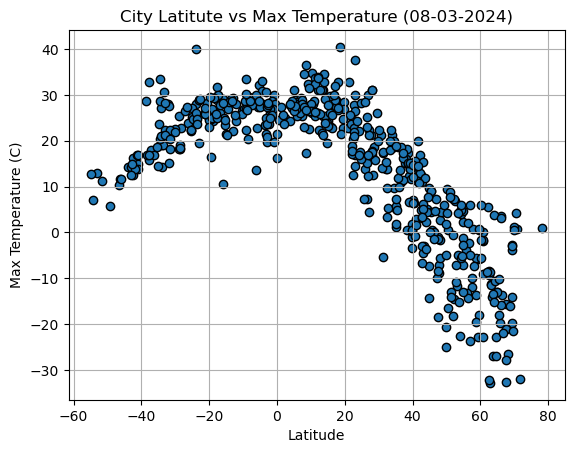

In [25]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitute vs Max Temperature (08-03-2024)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(visible=True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

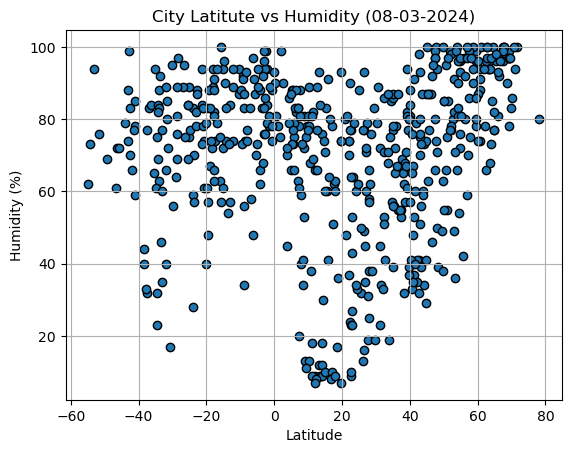

In [28]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitute vs Humidity (08-03-2024)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(visible=True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

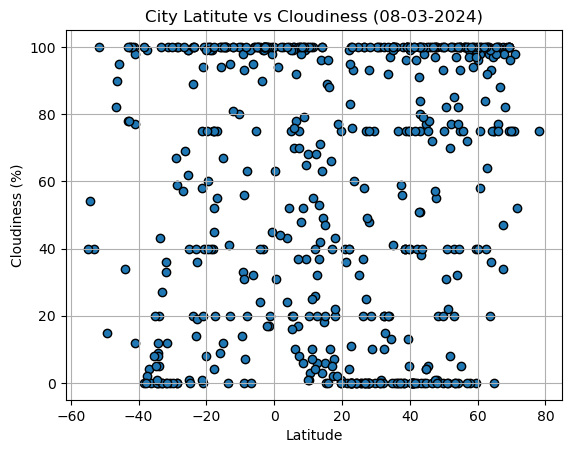

In [30]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitute vs Cloudiness (08-03-2024)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(visible=True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

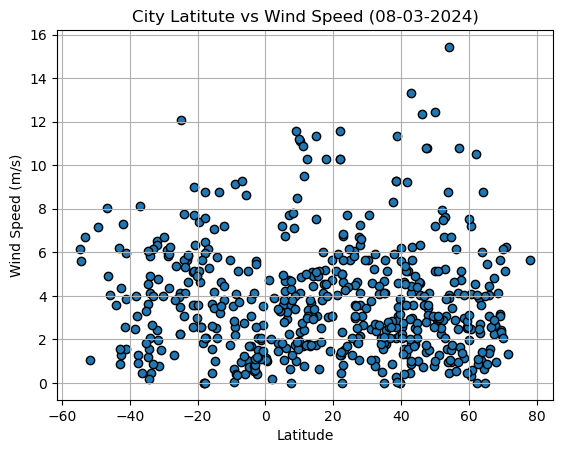

In [31]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitute vs Wind Speed (08-03-2024)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(visible=True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [109]:
# Define a function to create Linear Regression plots

def regplot(x_values, y_values, x_label, y_label, title):
       
    (slope, intercept, r_value, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plotting scatter plot
    plt.scatter(x_values,y_values)

    # Plotting regression line
    plt.plot(x_values,regress_values,"r-")

    # Annotation of the regression line to upper right quadrant of chart.
    plt.annotate(line_eq,(max(x_values)-30,max(y_values)-10),fontsize=15,color="red")
    
    # Title, x & y axis labels
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # Print r & r squared value
    print(f"The r-value is {r_value}")
    print(f"R squared: {r_value**2}")

    # Display plot
    plt.show()

In [32]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,fisterra,42.9049,-9.2629,10.97,70,51,13.30,ES,1709926313
1,yellowknife,62.4560,-114.3525,-9.21,66,40,0.00,CA,1709926313
4,labuan,5.2767,115.2417,27.20,88,20,3.60,MY,1709926313
5,tindouf,27.6711,-8.1474,21.25,19,0,6.69,DZ,1709926313
8,chernyshevskiy,63.0128,112.4714,-11.15,94,100,3.89,RU,1709926314


In [119]:
# Number of Cities in the Northern Hemipshere Dataframe
len(northern_hemi_df)

375

In [33]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,lupane,-18.9315,27.8070,24.32,67,100,2.58,ZW,1709926313
3,bredasdorp,-34.5322,20.0403,19.07,75,0,1.21,ZA,1709926313
6,inhambane,-23.8650,35.3833,27.99,83,20,3.09,MZ,1709926314
7,luanda,-8.8368,13.2343,28.00,83,0,2.57,AO,1709926216
9,port elizabeth,-33.9180,25.5701,19.16,88,0,4.12,ZA,1709926242


In [118]:
# Number of Cities in the Southern Hemipshere Dataframe
len(southern_hemi_df)

171

###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.8729443028633558
R squared: 0.7620317559015902


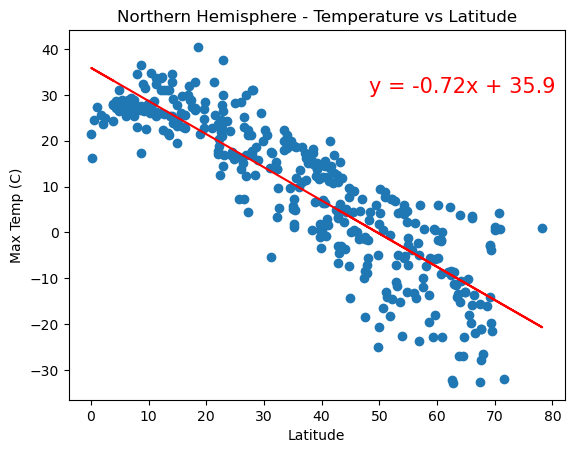

In [110]:
# Linear regression on Northern Hemisphere

regplot(x_values = northern_hemi_df['Lat'], 
        y_values = northern_hemi_df['Max Temp'], 
        x_label = "Latitude", 
        y_label = "Max Temp (C)", 
        title = "Northern Hemisphere - Temperature vs Latitude")

The r-value is 0.6257482437634477
R squared: 0.3915608645730392


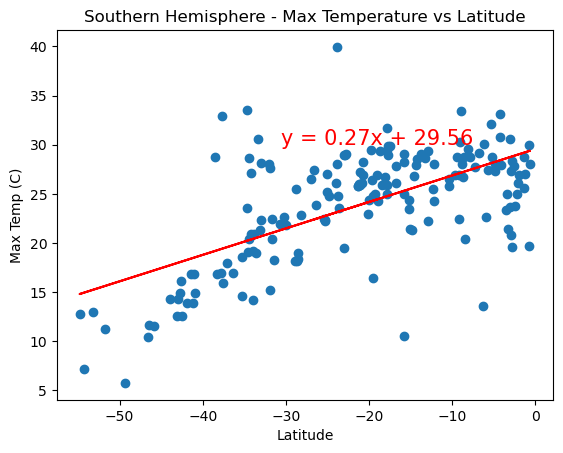

In [111]:
# Linear regression on Southern Hemisphere
regplot(x_values = southern_hemi_df['Lat'], 
        y_values=southern_hemi_df['Max Temp'], 
        x_label = "Latitude", 
        y_label = "Max Temp (C)", 
        title = "Southern Hemisphere - Max Temperature vs Latitude")

**Discussion about the linear relationship:** 
___
In the Northeren hemisphere Max Temp and Latitude is **strongly negatively correlated** with an **R-value of -0.87** & **R-Squared of 0.76**. In the Southeren hemisphere Max Temp and Latitude is **moderately positively correlated** with an **r-value of 0.63** & **R-Squared of 0.39**.

The negative correlation for the North and the positive correlation for the South, reveals that the further the city is from the equator (Latitude 0) the lower the Max Temp. This is also supported from experience where cities closer the equator have a more tropical weather compared to the cities close to the icy poles (+ or - 90 Latitude).

The strength of the correlation is better eplained with R Squared value. For the Northern Hemisphere the R Squared Value is greater than the Southern Hemisphere. This is visible on the two scatter plots above as there are more scatter dots closer to the regression line. There are more cities in the Northern Hemispshere (375 Cities) compared to the Cities in the Southeren Hemisphsere (171 Countries) in the data frame. This makes sense as 68% of earths landmass is found in the Northen Hemispshere [[1]](#1) and 90% of the population live in the Northern Hemisphere [[2]](#1). 

**Reference:**

<a id="1">[1]</a> 
Author: Benjamin Elisha Sawe (2018, December 6).
Article: 'Which Hemisphere Has The Largest Area Covered By Land?'.
Website: [worldatlas.com](https://www.worldatlas.com/articles/which-hemisphere-has-the-largest-area-covered-by-land.html).

<a id="2">[2]</a> 
Article: 'Hemispheres of Earth' (2024, March 7).
Website: [In Wikipedia](https://en.wikipedia.org/wiki/Hemispheres_of_Earth).
___

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.4167865225048857
R squared: 0.17371100534171557


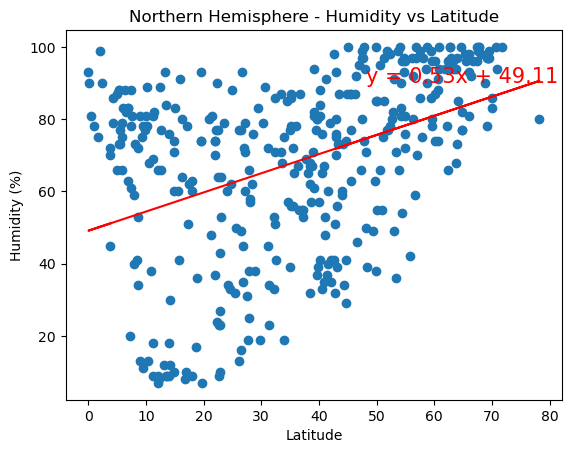

In [112]:
# Northern Hemisphere
regplot(x_values = northern_hemi_df['Lat'], 
        y_values = northern_hemi_df['Humidity'], 
        x_label = "Latitude", 
        y_label = "Humidity (%)", 
        title = "Northern Hemisphere - Humidity vs Latitude")

The r-value is 0.2501375917061622
R squared: 0.0625688147845587


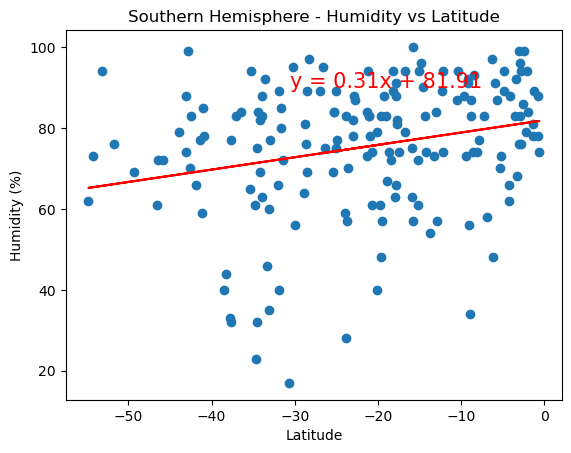

In [113]:
# Southern Hemisphere
regplot(x_values = southern_hemi_df['Lat'], 
        y_values=southern_hemi_df['Humidity'], 
        x_label = "Latitude", 
        y_label = "Humidity (%)", 
        title = "Southern Hemisphere - Humidity vs Latitude")

**Discussion about the linear relationship:**
___
In the Northeren hemisphere Humidity and Latitude is **weakly positively correlated** with an **R-value of 0.42** & **R-Squared of 0.13**. In the Southeren hemisphere Humidity and Latitude is **not correlated** with an **r-value of 0.25** & **R-Squared of 0.06**.

This is a surprising finding as the assummption would be that tropical cities would have higher humidity compared to cities in temperate and polar climate zones. The R Squared values are also very small, suggesting that there may be other factors which which would influence humidity [[1]](#1). 

**Reference:**

<a id="1">[1]</a> 
Author: Mwaikusa (2022, July 11).
Article: '10 FACTORS THAT INFLUENCE THE HUMIDITY OF THE PLACE'.
Website: [geographypoint.com](https://geographypoint.com/2022/07/factors-which-influence-the-humidity-of-a-place/#google_vignette).
___

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.2293256866336558
R squared: 0.052590270549997695


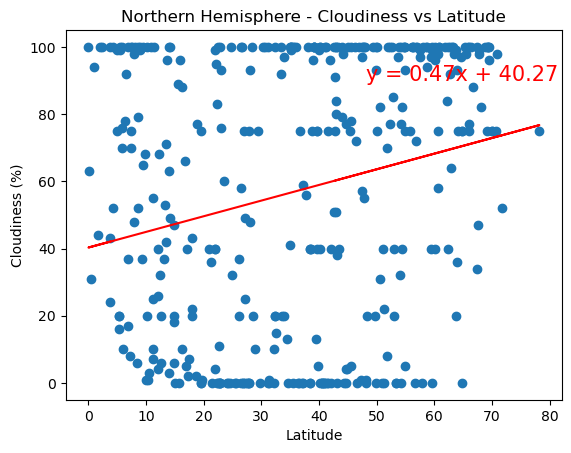

In [120]:
# Northern Hemisphere
regplot(x_values = northern_hemi_df['Lat'], 
        y_values = northern_hemi_df['Cloudiness'], 
        x_label = "Latitude", 
        y_label = "Cloudiness (%)", 
        title = "Northern Hemisphere - Cloudiness vs Latitude")

The r-value is 0.2493095293641245
R squared: 0.06215524143176126


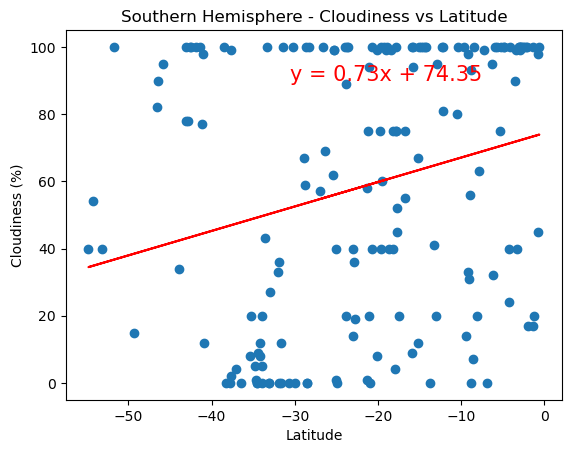

In [115]:
# Southern Hemisphere
regplot(x_values = southern_hemi_df['Lat'], 
        y_values=southern_hemi_df['Cloudiness'], 
        x_label = "Latitude", 
        y_label = "Cloudiness (%)", 
        title = "Southern Hemisphere - Cloudiness vs Latitude")

**Discussion about the linear relationship:**
___
In the Northeren hemisphere Cloudiness and Latitude is **not correlated** with an **R-value of 0.23** & **R-Squared of 0.05**. In the Southeren hemisphere Cloudiness and Latitude is **not correlated** with an **r-value of 0.25** & **R-Squared of 0.06**.

There is no coorelation with between Cloudiness and Latitude given the R-value for both scatter plots is < 0.30
___

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is -0.07248356752328682
R squared: 0.0052538675609028794


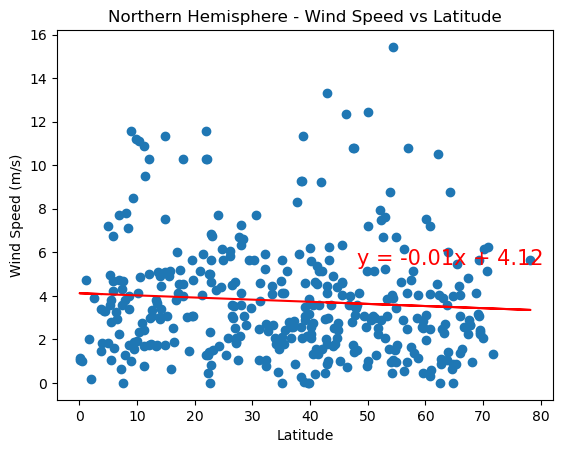

In [116]:
# Northern Hemisphere
regplot(x_values = northern_hemi_df['Lat'], 
        y_values = northern_hemi_df['Wind Speed'], 
        x_label = "Latitude", 
        y_label = "Wind Speed (m/s)", 
        title = "Northern Hemisphere - Wind Speed vs Latitude")

The r-value is -0.1994306238010171
R squared: 0.039772573709662806


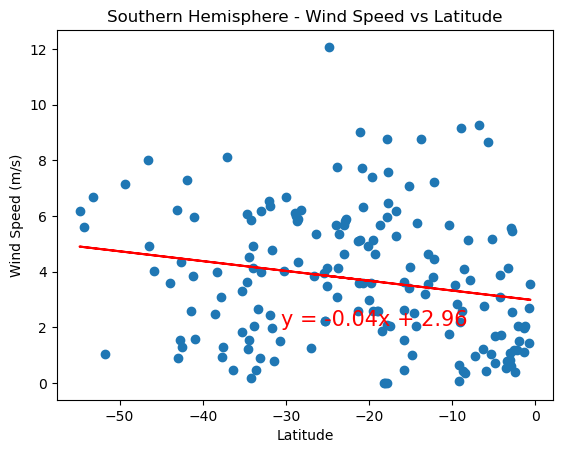

In [117]:
# Southern Hemisphere
regplot(x_values = southern_hemi_df['Lat'], 
        y_values=southern_hemi_df['Wind Speed'], 
        x_label = "Latitude", 
        y_label = "Wind Speed (m/s)", 
        title = "Southern Hemisphere - Wind Speed vs Latitude")

**Discussion about the linear relationship:** 
___
In the Northeren hemisphere Wind Speed and Latitude is **not correlated** with an **R-value of -0.07** & **R-Squared of 0.005**. In the Southeren hemisphere Wind Speed and Latitude is **not correlated** with an **r-value of -0.20** & **R-Squared of 0.04**.

There is no coorelation with between Wind Speed and Latitude given the R-value for both scatter plots is < 0.30. Other factors affecting wind speed could be explored.
___